In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from TextClustering import Preprocessing

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/henrique/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/henrique/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/henrique/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
/home/henrique/.local/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


### Inicialização do conjunto de dados

In [2]:
dataset = pd.read_csv("datasets_202410081046-ipea.csv")
dataset = dataset.dropna(subset = ['description'])
dataset[['name', 'description']]

,name,description
0,Balanço de pagamentos - conta capital - despesa,O balanço de pagamentos é uma peça contábil qu...
1,Base Monetária restrita - M0 - reservas bancár...,A base monetária corresponde ao passivo monetá...
2,Produção industrial - bens de consumo não durá...,A produção industrial de bens de consumo não d...
3,Exportações - produtos de madeira - preços - í...,Este índice busca captar o efeito dos preços s...
4,Taxa de câmbio real bilateral - IPA-DI - Brasi...,A taxa de câmbio real bilateral é definida pel...
...,...,...
4405,Indicador IPEA de FBCF - índice real (média 19...,A Formação Bruta de Capital Fixo (FBCF) da eco...
4406,Taxa de juros prefixada - estrutura a termo - ...,A taxa de juros é o coeficiente que determina ...
4407,Índice de custo da tecnologia da informação (I...,O Índice de Custos da Tecnologia da Informação...
4408,IPA-M - 1º decêndio,O Índice de Preços ao Produtor Amplo (IPA) é u...


### Préprocessamento usando a descrição como atributo

In [3]:
description = Preprocessing(dataset, 'description', 'id')

Geração do vetor de representação utilizando o BERT

In [5]:
desc_bert = description.Bert()
len(desc_bert.embeddings[1])

512

Avaliação do valor de k que apresenta a melhor medida de silhueta. Em seguida utiliza-se os melhores valores de k para a construção do gráfico de silhuetas para cada valor de k

100%|██████████| 49/49 [02:45<00:00,  3.39s/it]


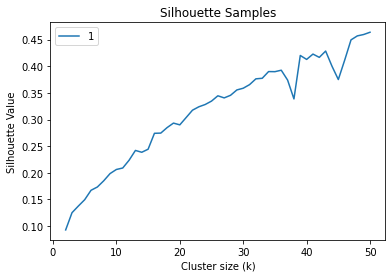

(50, 0.46388724)


In [6]:
bestK_desc_bert, desc_kValues_bert = desc_bert.BestK(50)
print(bestK_desc_bert)

 20%|██        | 1/5 [00:04<00:17,  4.34s/it]

For n_clusters = 46 The average silhouette_score is : 0.41144156


 40%|████      | 2/5 [00:10<00:15,  5.13s/it]

For n_clusters = 47 The average silhouette_score is : 0.44956622


 60%|██████    | 3/5 [00:14<00:09,  4.70s/it]

For n_clusters = 48 The average silhouette_score is : 0.4570538


 80%|████████  | 4/5 [00:18<00:04,  4.38s/it]

For n_clusters = 49 The average silhouette_score is : 0.45964426


100%|██████████| 5/5 [00:21<00:00,  4.35s/it]

For n_clusters = 50 The average silhouette_score is : 0.46388724


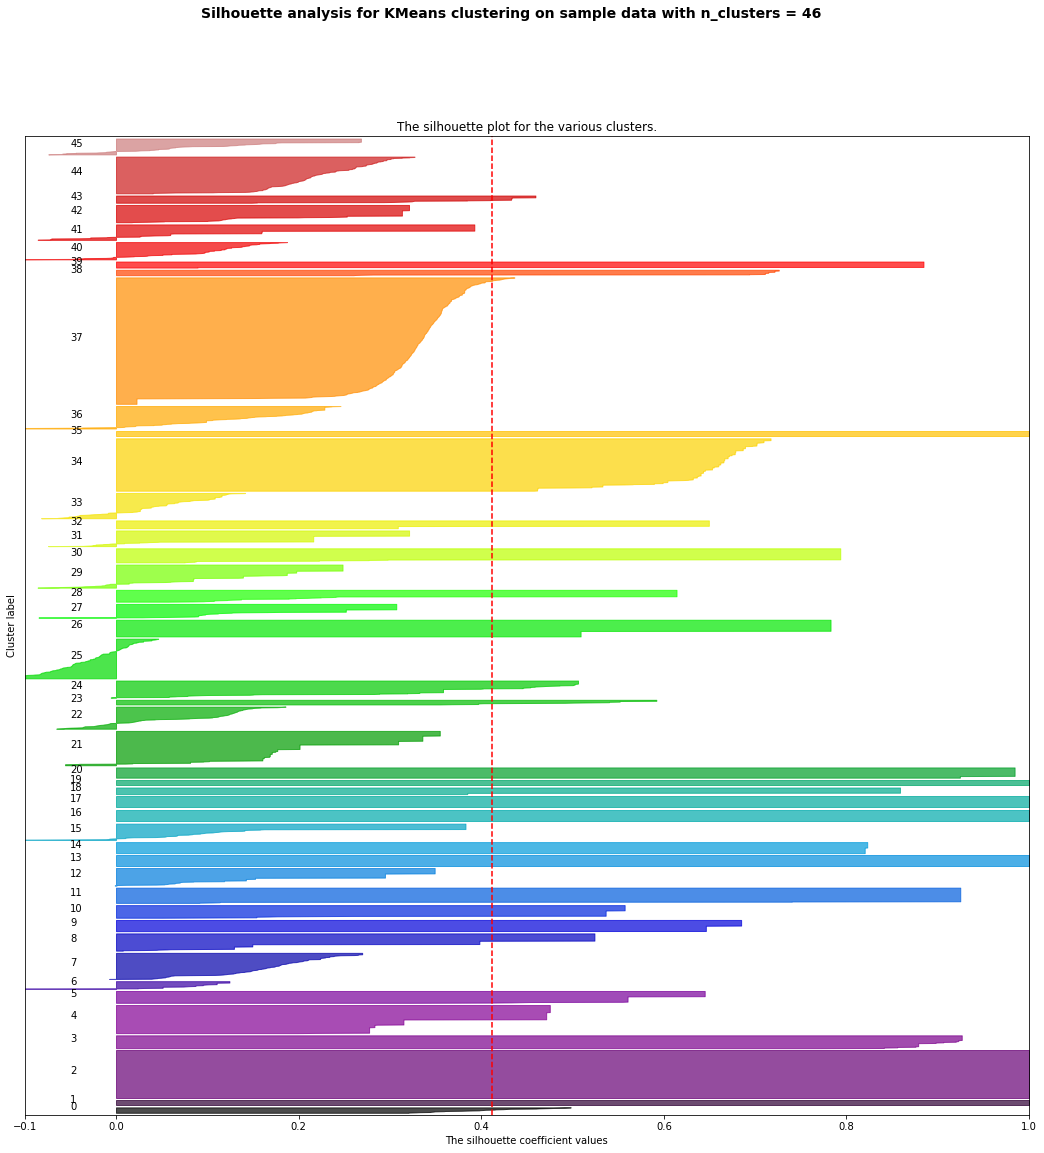

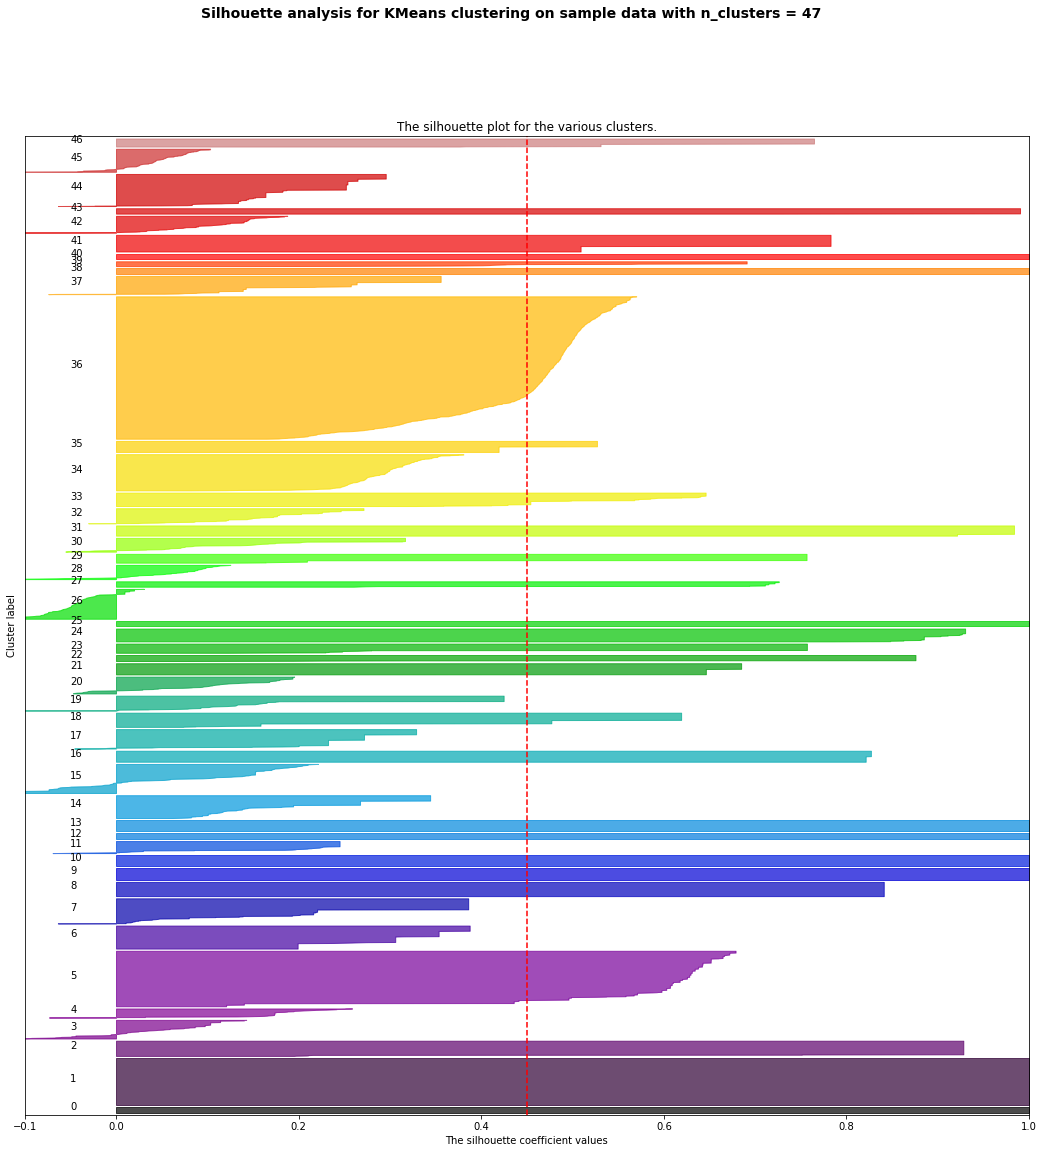

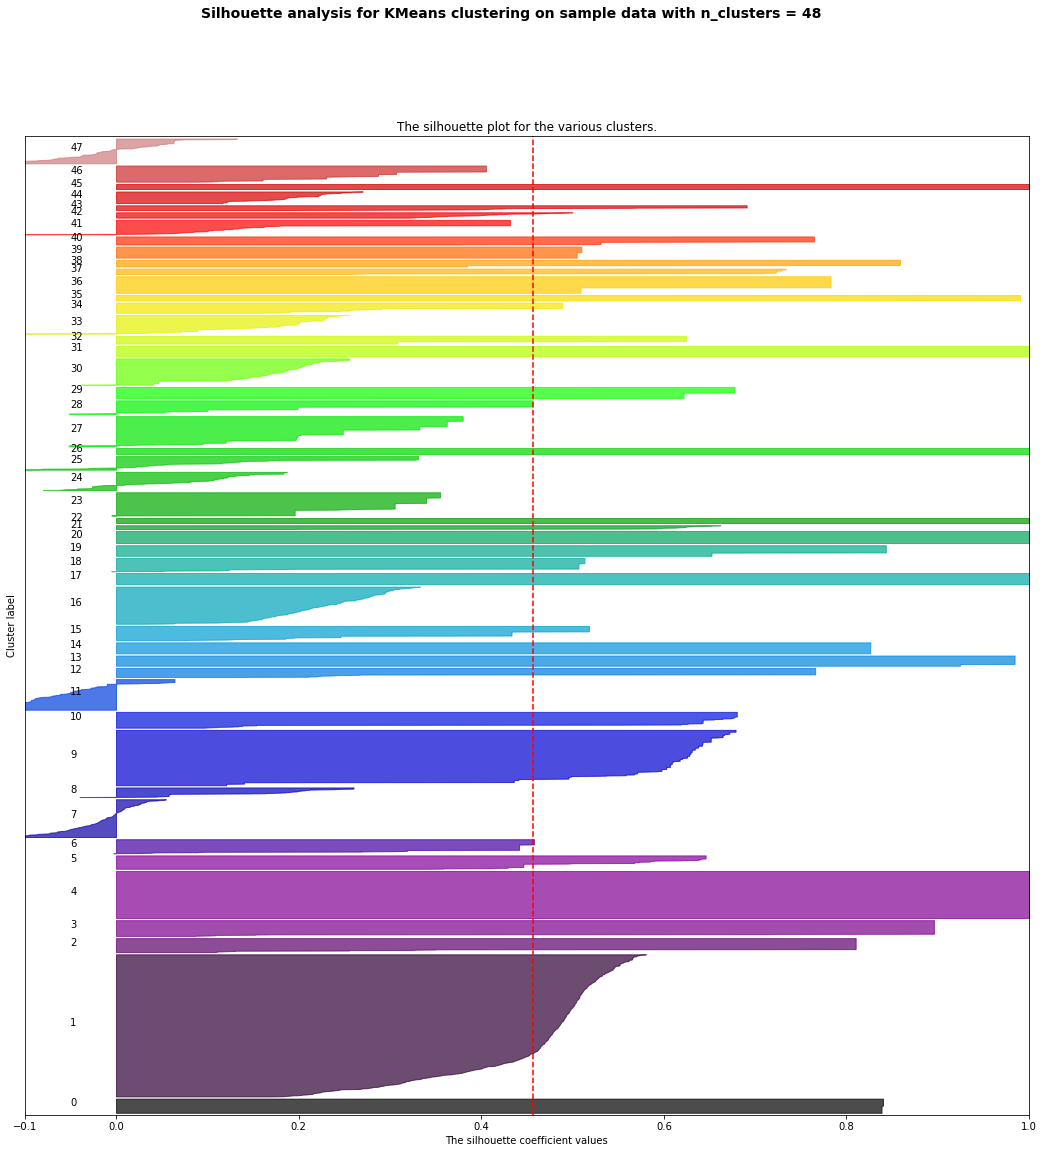

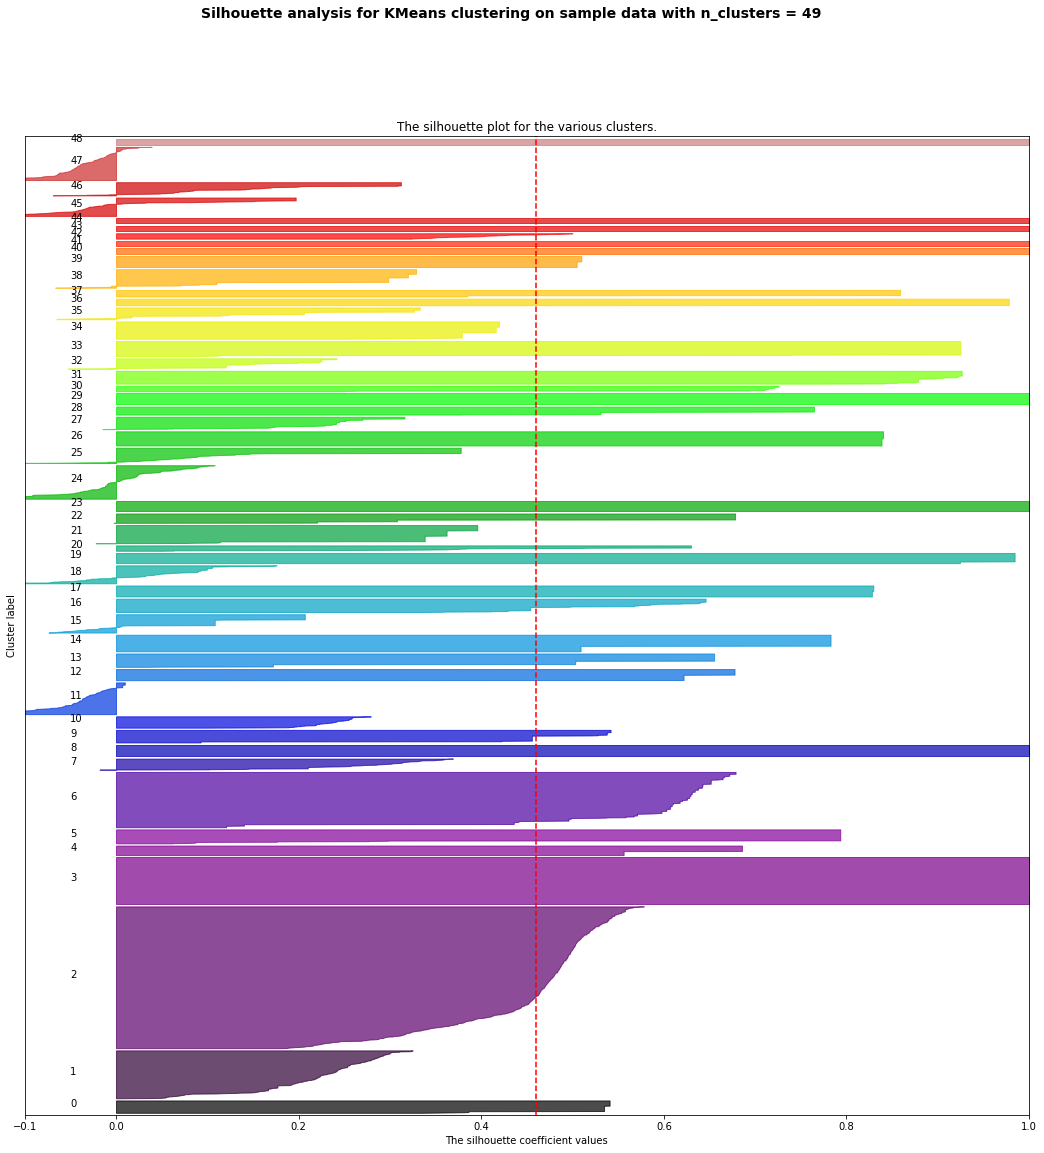

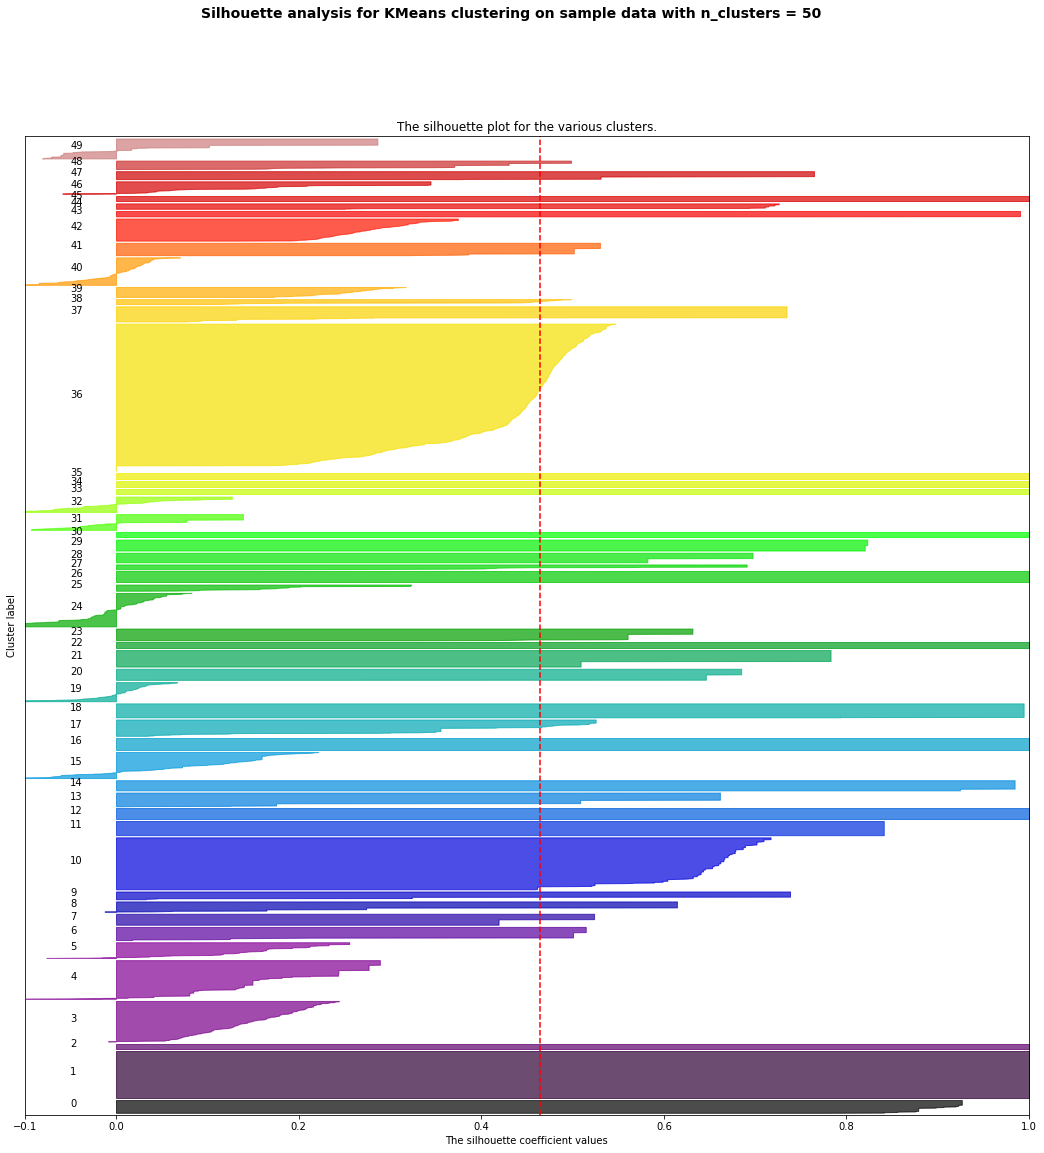

In [7]:
desc_bert.SilhouettePlot(range_n_clusters=[46, 47, 48, 49, 50])

Geração do vetor de representação utilizando o TF-IDF

In [9]:
desc_tfidf = description.Tfidf()
len(desc_tfidf.values.embeddings[1])

543

Avaliação do valor de k que apresenta a melhor medida de silhueta. Em seguida utiliza-se os melhores valores de k para a construção do gráfico de silhuetas para cada valor de k

100%|██████████| 49/49 [02:46<00:00,  3.40s/it]


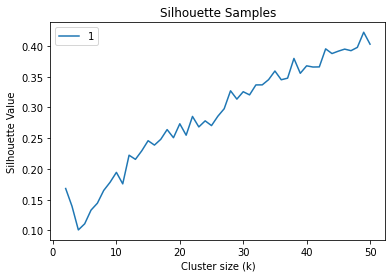

(49, 0.42239596965853055)


In [10]:
bestK_desc_tfidf,desc_kValues_tfidf = desc_tfidf.BestK(50)
print(bestK_desc_tfidf)

 20%|██        | 1/5 [00:03<00:14,  3.59s/it]

For n_clusters = 46 The average silhouette_score is : 0.39494246057735605


 40%|████      | 2/5 [00:07<00:10,  3.61s/it]

For n_clusters = 47 The average silhouette_score is : 0.39242872655840233


 60%|██████    | 3/5 [00:10<00:07,  3.60s/it]

For n_clusters = 48 The average silhouette_score is : 0.3977658414370888
For n_clusters = 49 The average silhouette_score is : 0.42239596965853055


100%|██████████| 5/5 [00:18<00:00,  3.74s/it]

For n_clusters = 50 The average silhouette_score is : 0.4030041750626684


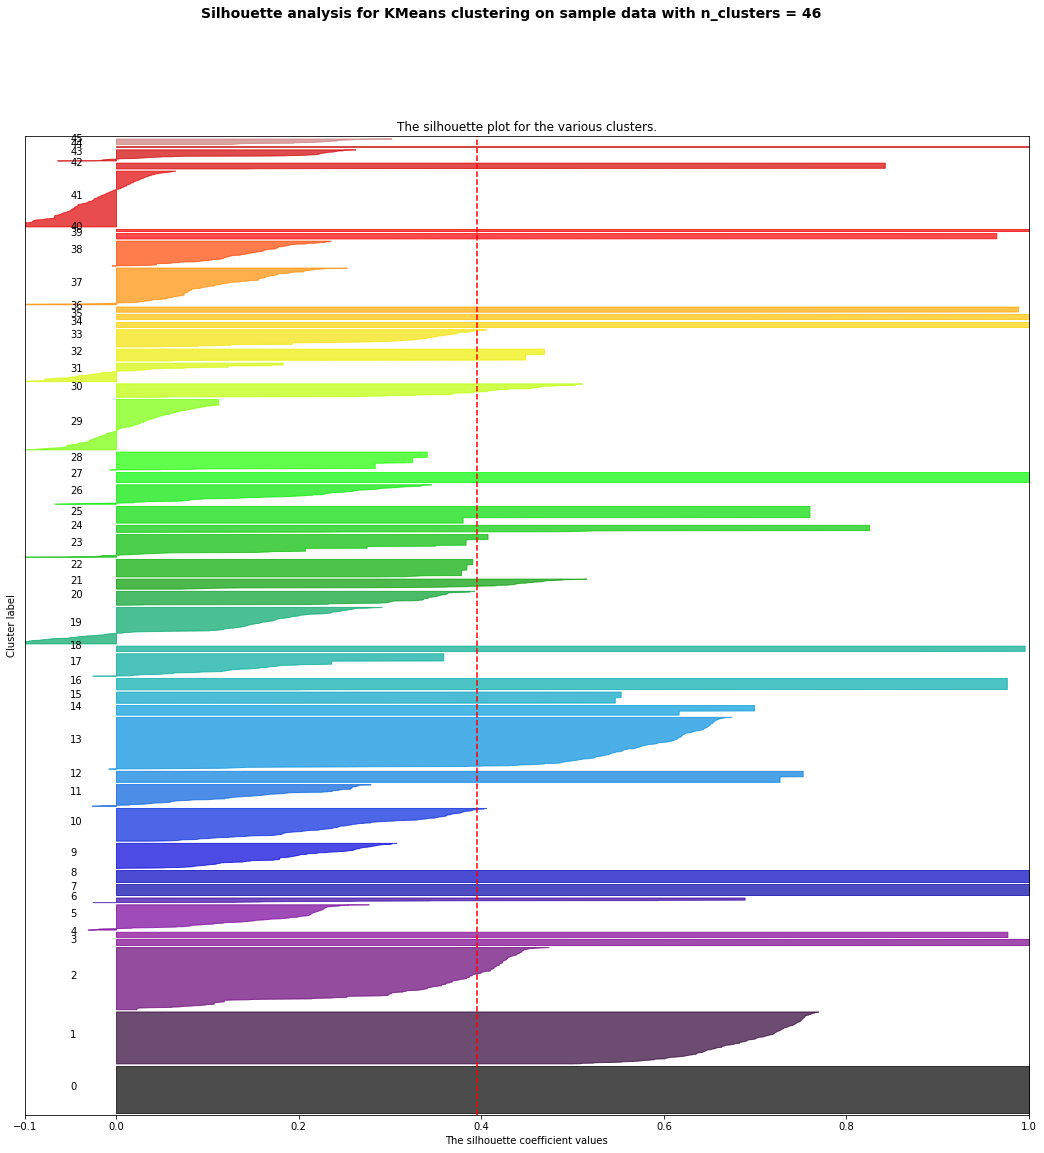

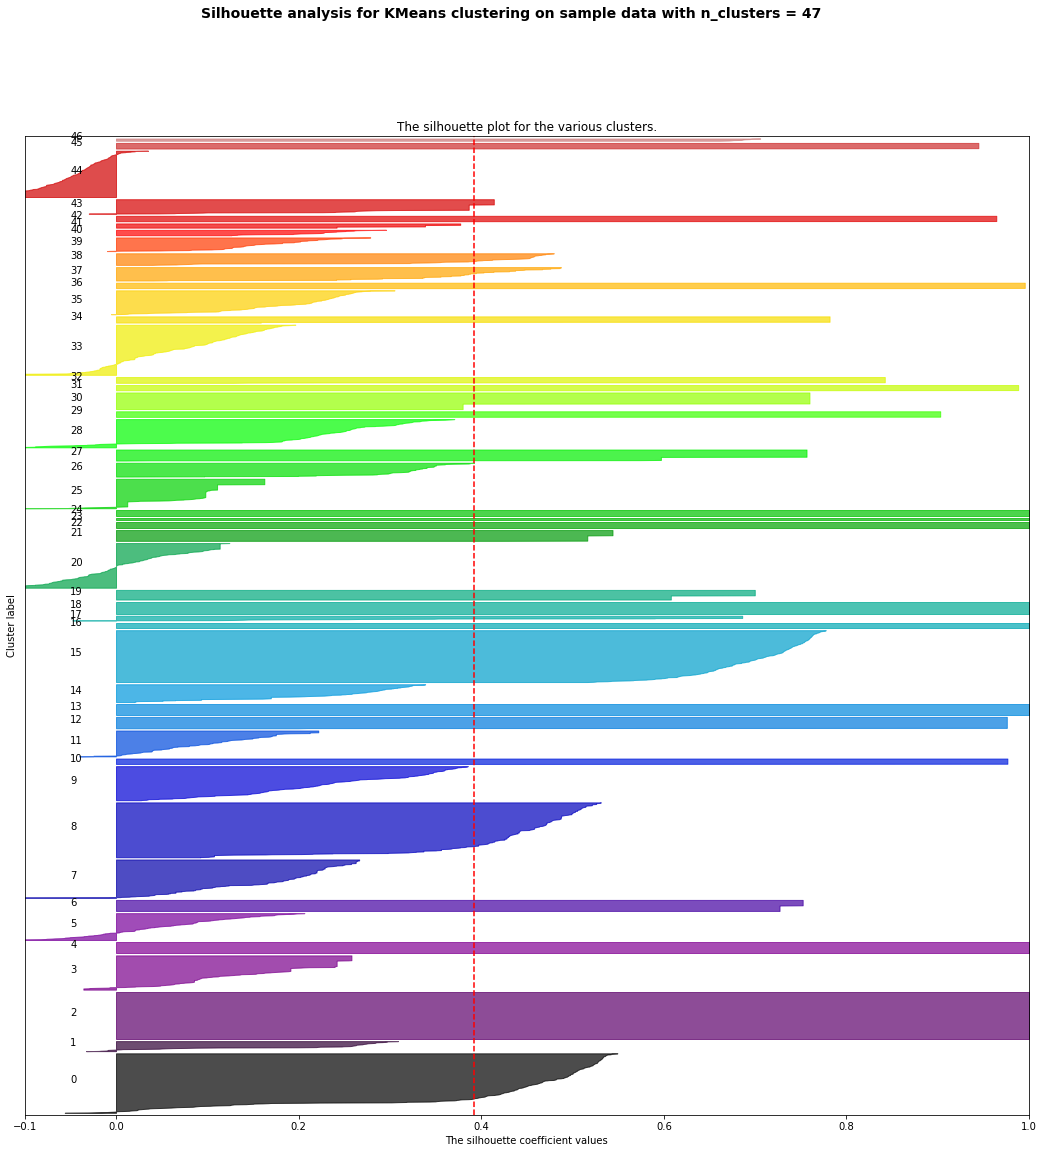

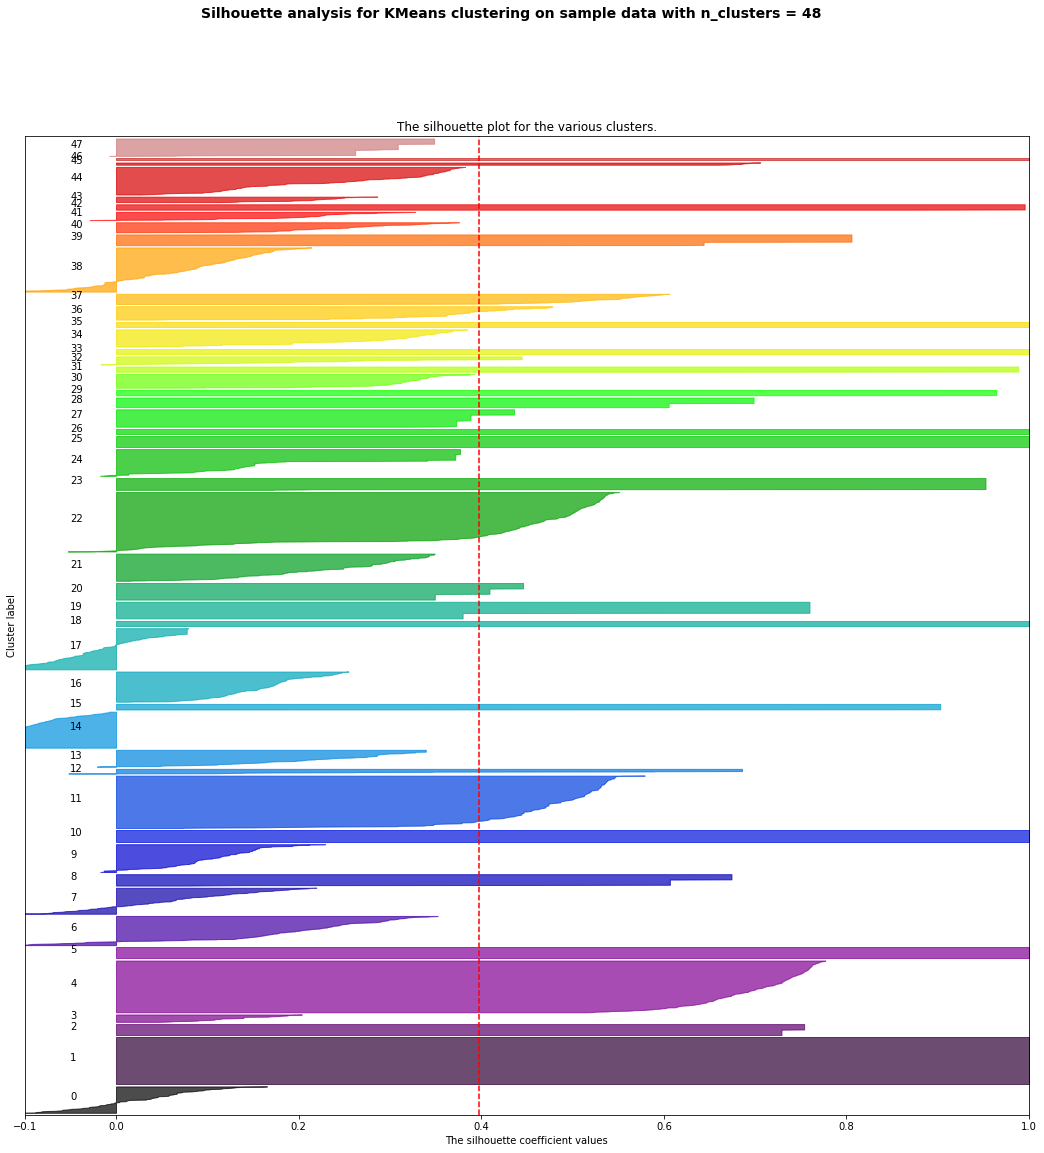

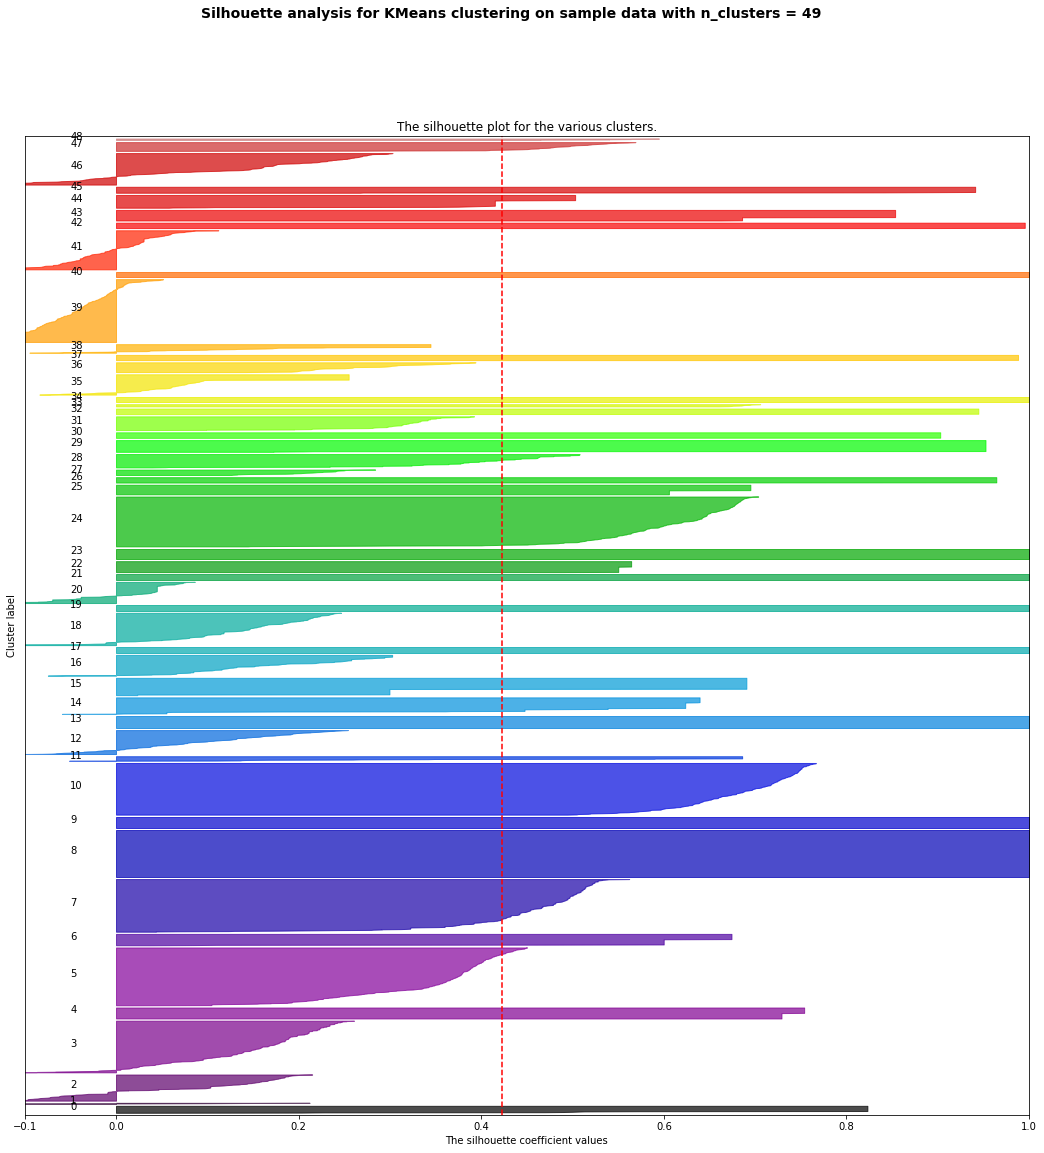

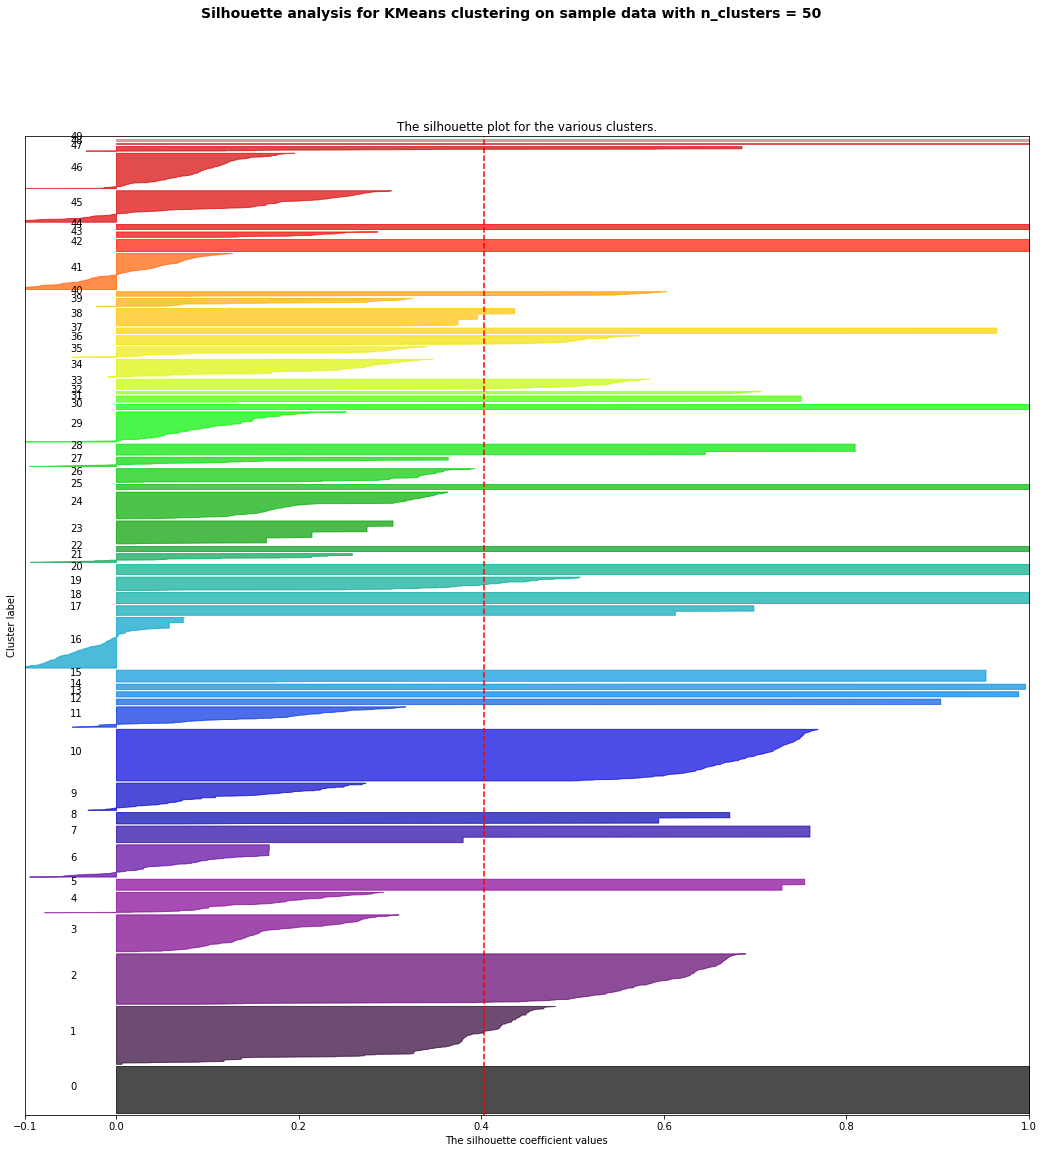

In [11]:
desc_tfidf.SilhouettePlot(range_n_clusters=[46, 47, 48, 49, 50])

Avaliação da alteração na quantidade de ngramas do TF-IDF nos valores de silhueta

100%|██████████| 49/49 [06:41<00:00,  8.20s/it]


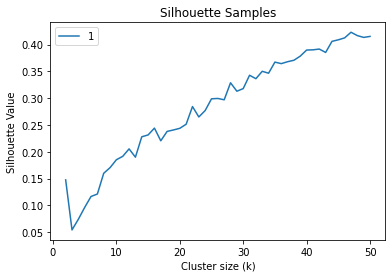

(47, 0.4230838552651141)


In [13]:
desc_tfidf = description.Tfidf(ngram_range=(3,3))
bestK_desc_tfidf,desc_kValues_tfidf = desc_tfidf.BestK(50)
print(bestK_desc_tfidf)

Matriz de distância dos agrupamentos para os métodos TF-IDF e BERT

In [15]:
desc_tfidf = description.Tfidf(ngram_range=(2,2))

In [16]:
bert_distances = desc_bert.ClustersDistances()
tfidf_distances = desc_tfidf.ClustersDistances()

In [17]:
fig = px.imshow(bert_distances, text_auto=True)
fig.show()

In [18]:
fig = px.imshow(tfidf_distances, text_auto=True)
fig.show()

### Préprocessamento usando o título como atributo

In [19]:

title = Preprocessing(dataset, 'name', 'id')


Geração do vetor de representação utilizando o BERT

In [21]:
title_bert = title.Bert()
len(title_bert.embeddings[1])

512

Avaliação do valor de k que apresenta a melhor medida de silhueta. Em seguida utiliza-se os melhores valores de k para a construção do gráfico de silhuetas para cada valor de k

100%|██████████| 49/49 [02:48<00:00,  3.44s/it]


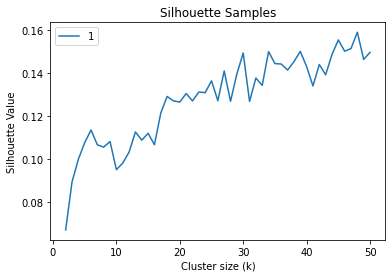

(48, 0.1588788)


In [22]:
bestK_title_bert, title_kValues_bert = title_bert.BestK(50)
print(bestK_title_bert)

 20%|██        | 1/5 [00:03<00:15,  3.96s/it]

For n_clusters = 46 The average silhouette_score is : 0.1500739


 40%|████      | 2/5 [00:07<00:11,  3.87s/it]

For n_clusters = 47 The average silhouette_score is : 0.15130912


 60%|██████    | 3/5 [00:11<00:07,  3.82s/it]

For n_clusters = 48 The average silhouette_score is : 0.1588788


 80%|████████  | 4/5 [00:15<00:03,  3.82s/it]

For n_clusters = 49 The average silhouette_score is : 0.14626312


100%|██████████| 5/5 [00:19<00:00,  3.94s/it]

For n_clusters = 50 The average silhouette_score is : 0.14955103


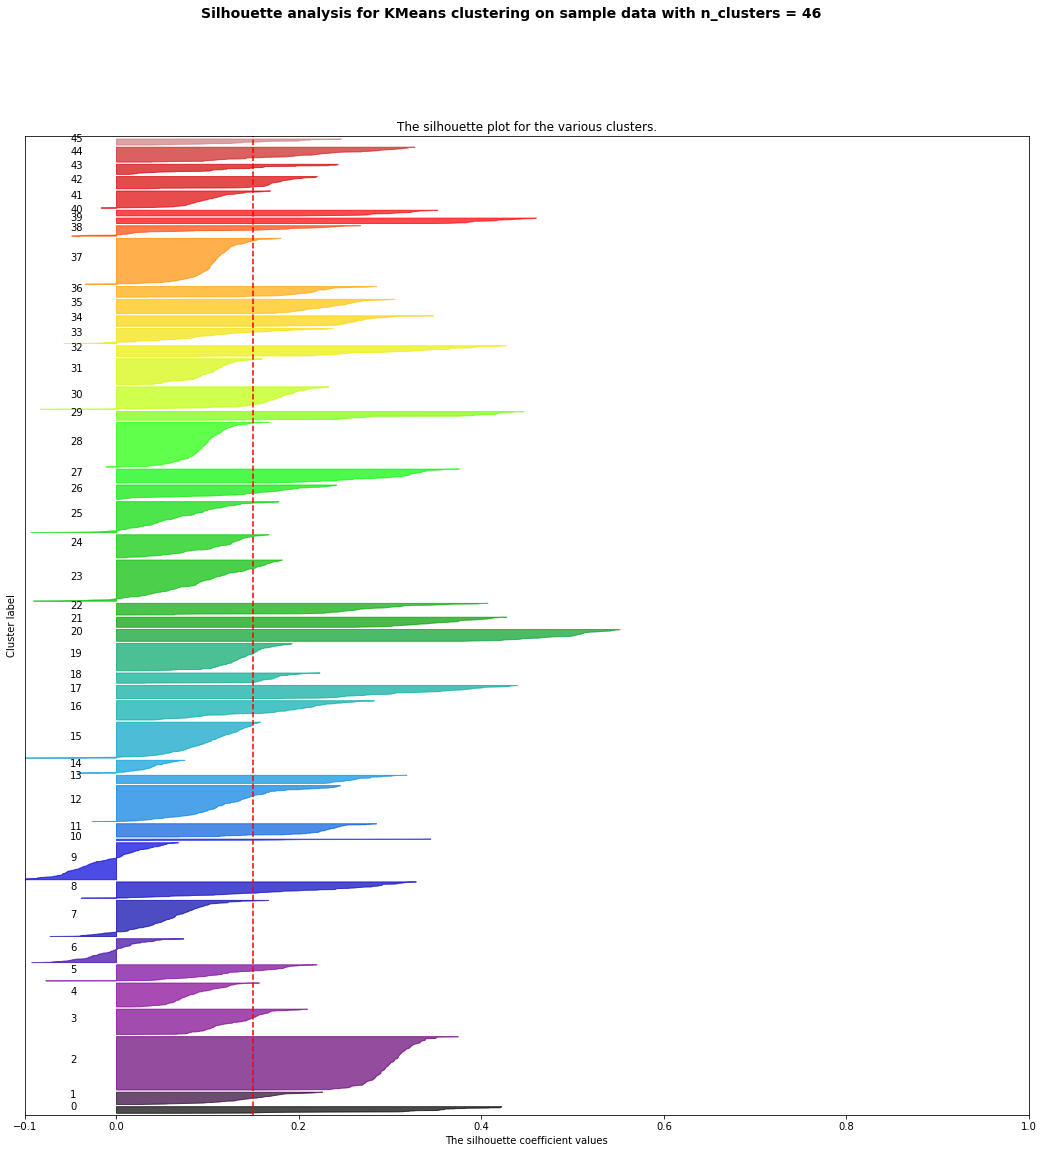

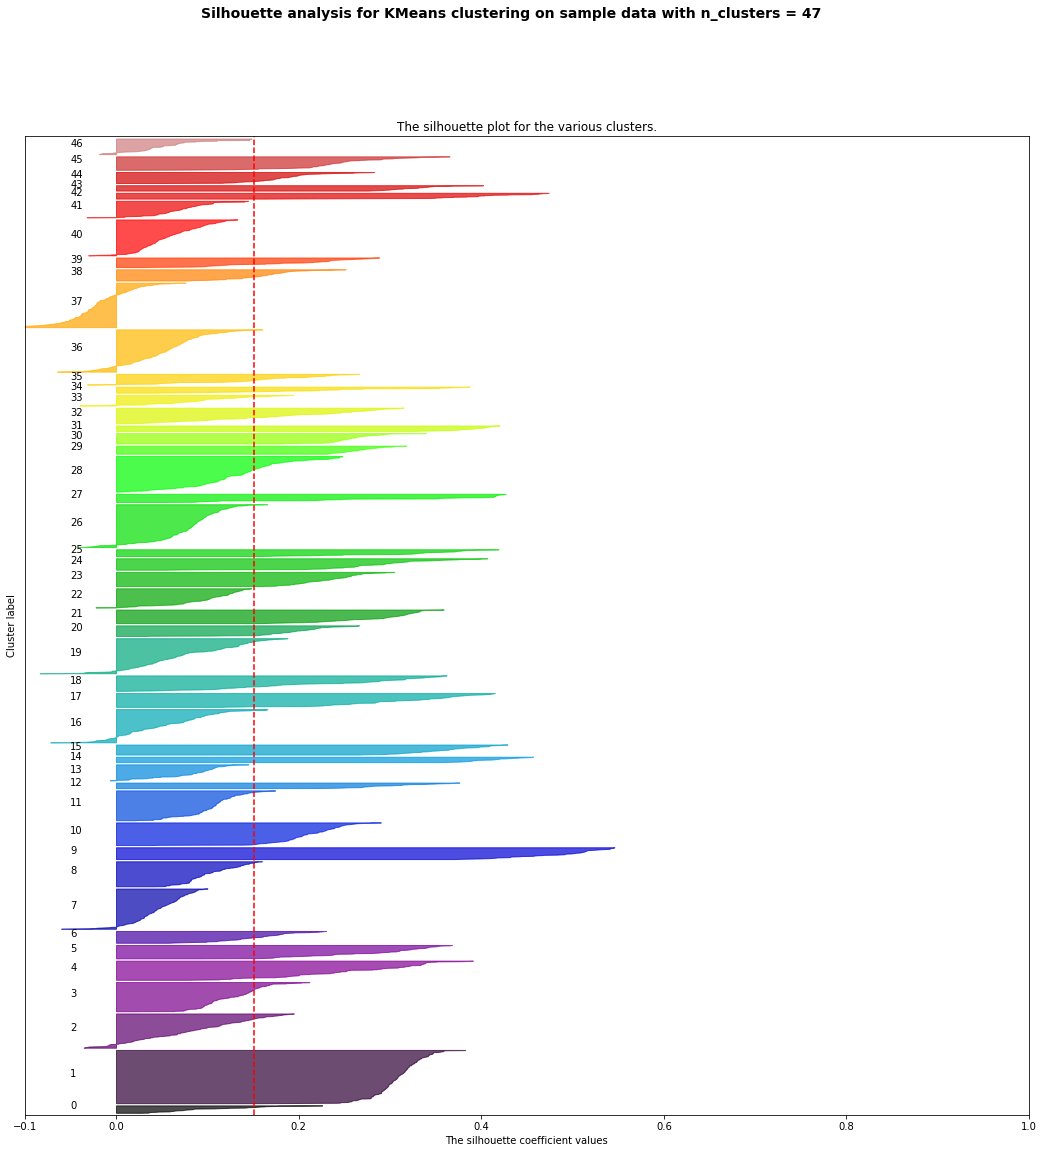

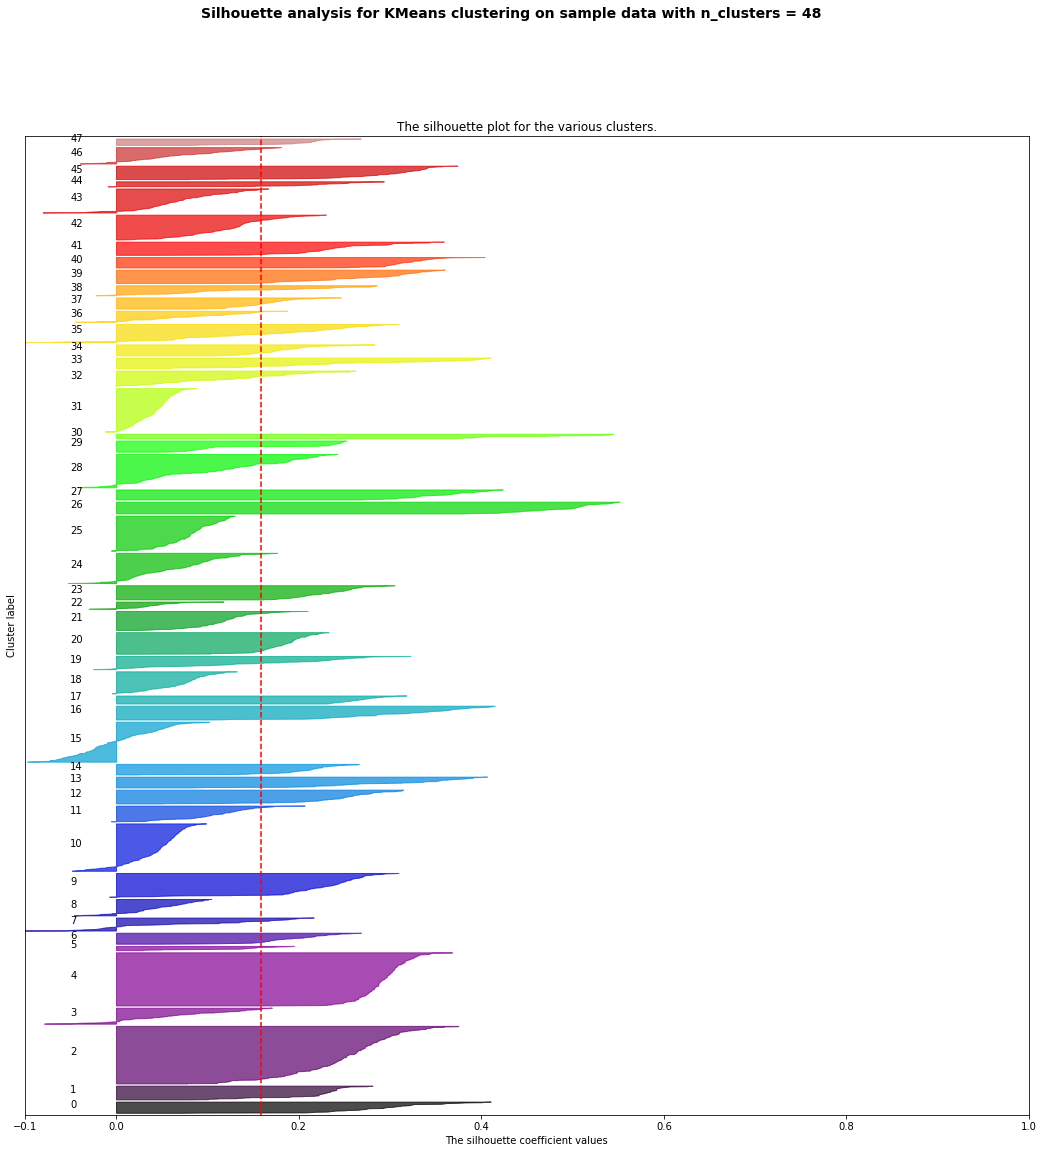

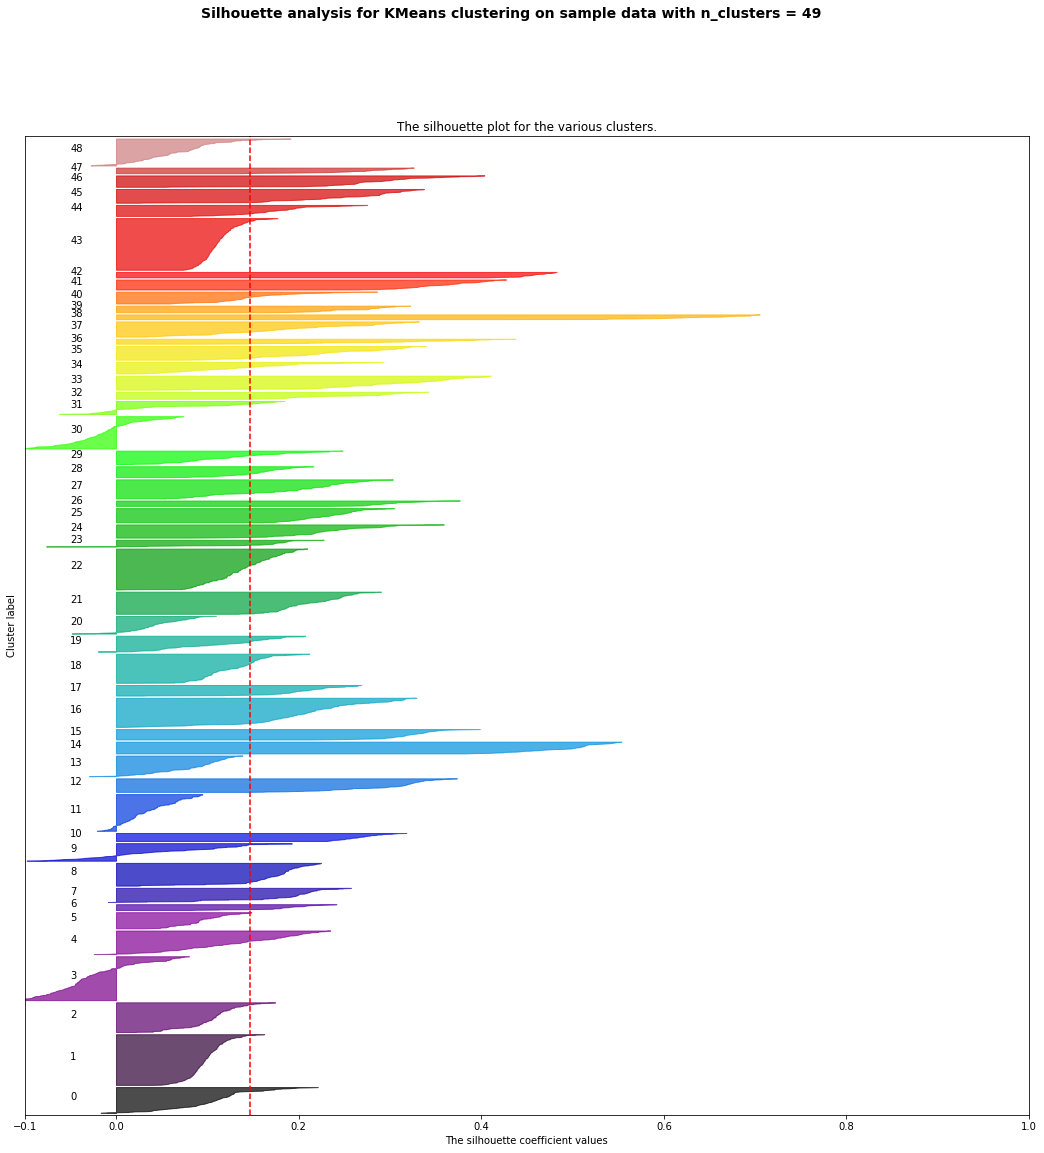

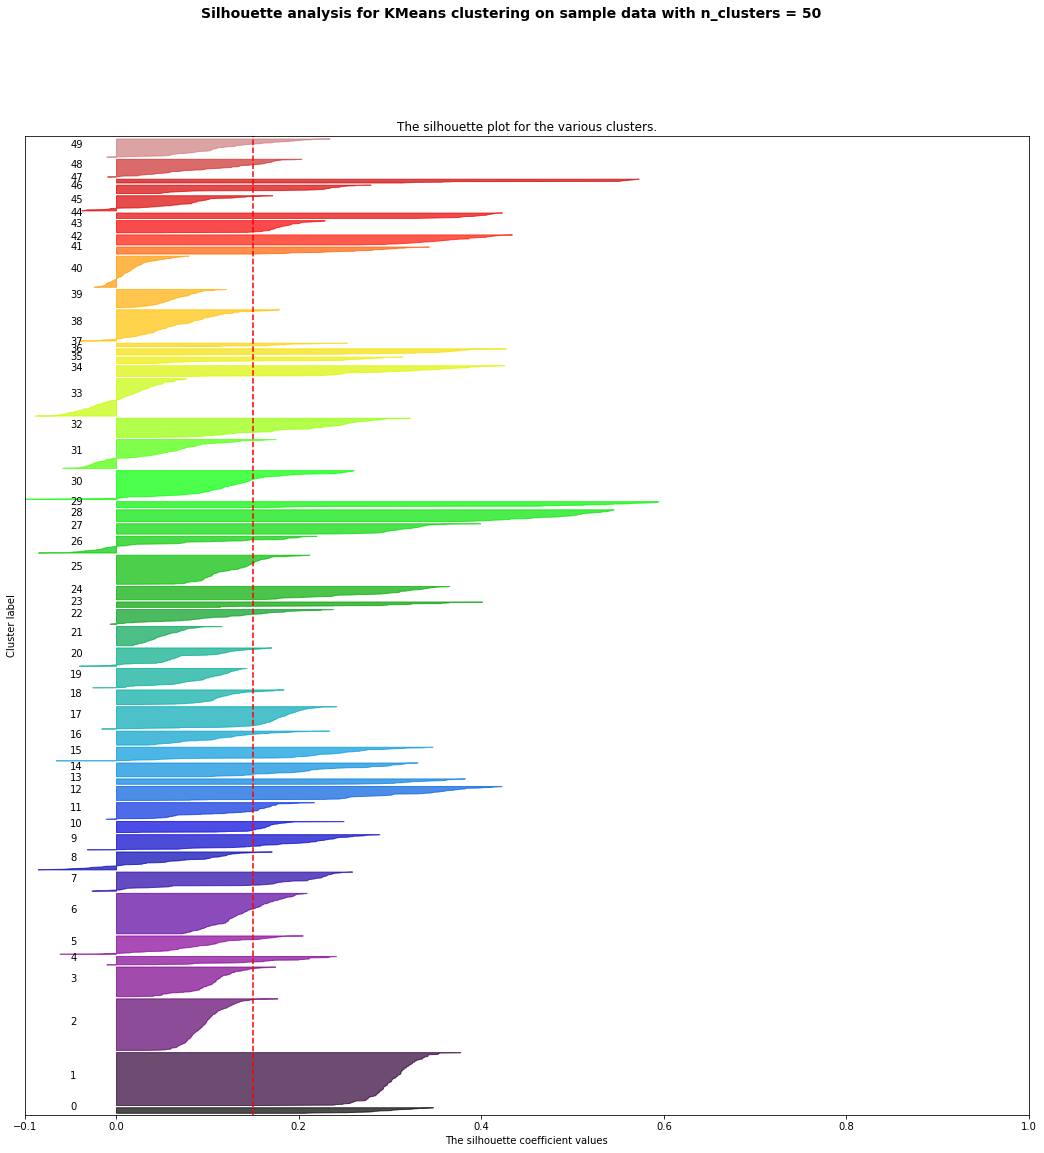

In [23]:
title_bert.SilhouettePlot(range_n_clusters=[46, 47, 48, 49, 50])


Geração do vetor de representação utilizando o TF-IDF

In [25]:
title_tfidf = title.Tfidf(ngram_range=(2,2))
len(title_tfidf.values.embeddings[1])

364


Avaliação do valor de k que apresenta a melhor medida de silhueta. Em seguida utiliza-se os melhores valores de k para a construção do gráfico de silhuetas para cada valor de k

100%|██████████| 49/49 [02:44<00:00,  3.35s/it]


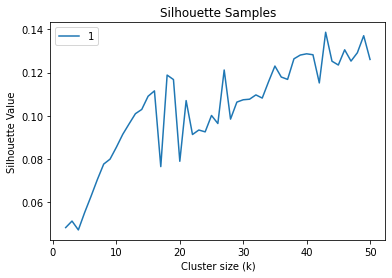

(43, 0.13862248135951277)


In [26]:
bestK_title_tfidf, title_kValues_tfidf = title_tfidf.BestK(50)
print(bestK_title_tfidf)

 20%|██        | 1/5 [00:03<00:14,  3.74s/it]

For n_clusters = 43 The average silhouette_score is : 0.13862248135951277


 40%|████      | 2/5 [00:07<00:11,  3.77s/it]

For n_clusters = 44 The average silhouette_score is : 0.12524447574771563


 60%|██████    | 3/5 [00:11<00:07,  3.72s/it]

For n_clusters = 45 The average silhouette_score is : 0.12349202103500173


 80%|████████  | 4/5 [00:14<00:03,  3.66s/it]

For n_clusters = 46 The average silhouette_score is : 0.13051875988011188


100%|██████████| 5/5 [00:18<00:00,  3.77s/it]

For n_clusters = 47 The average silhouette_score is : 0.12530102608872826


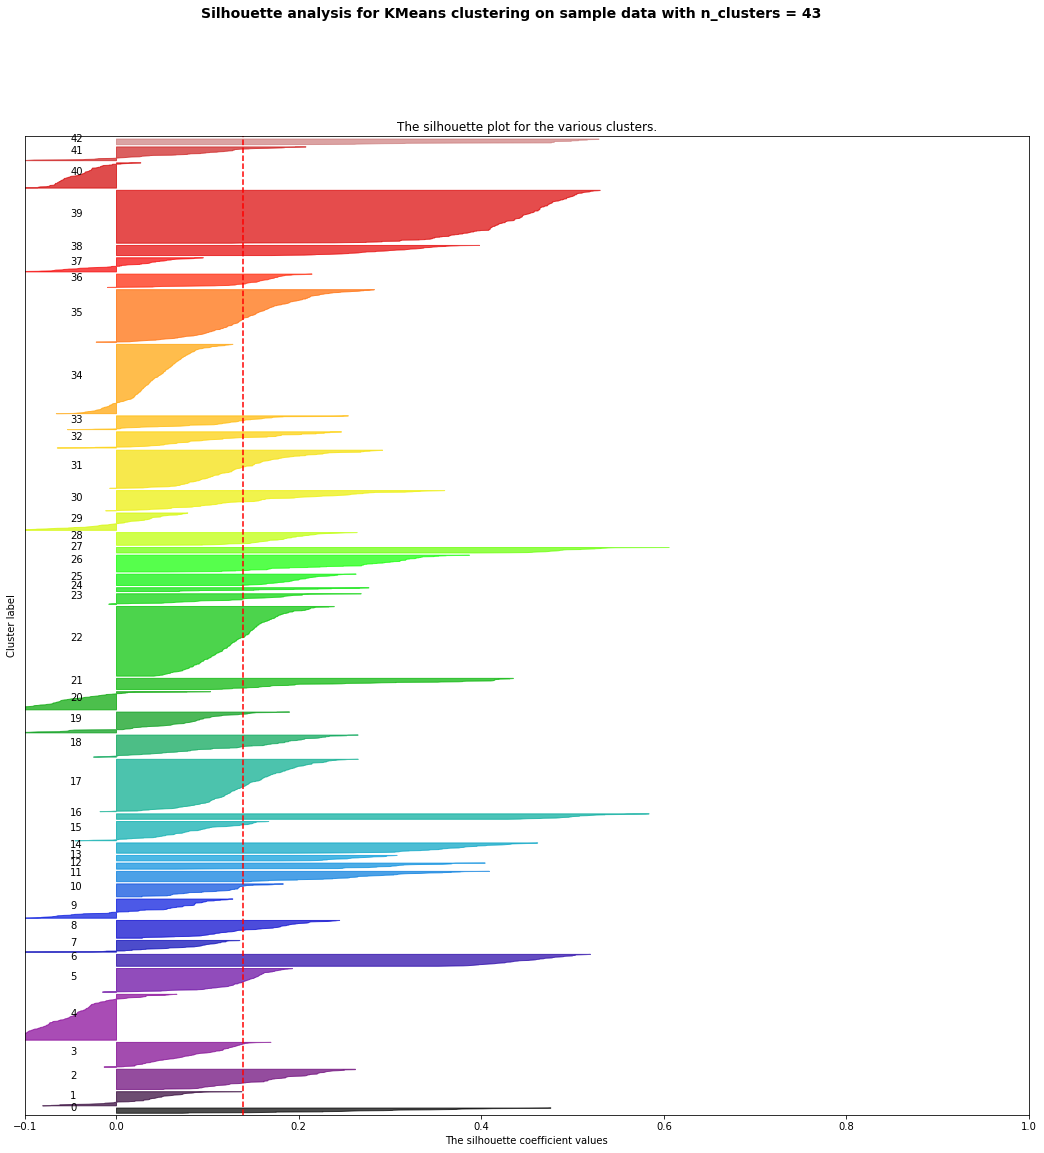

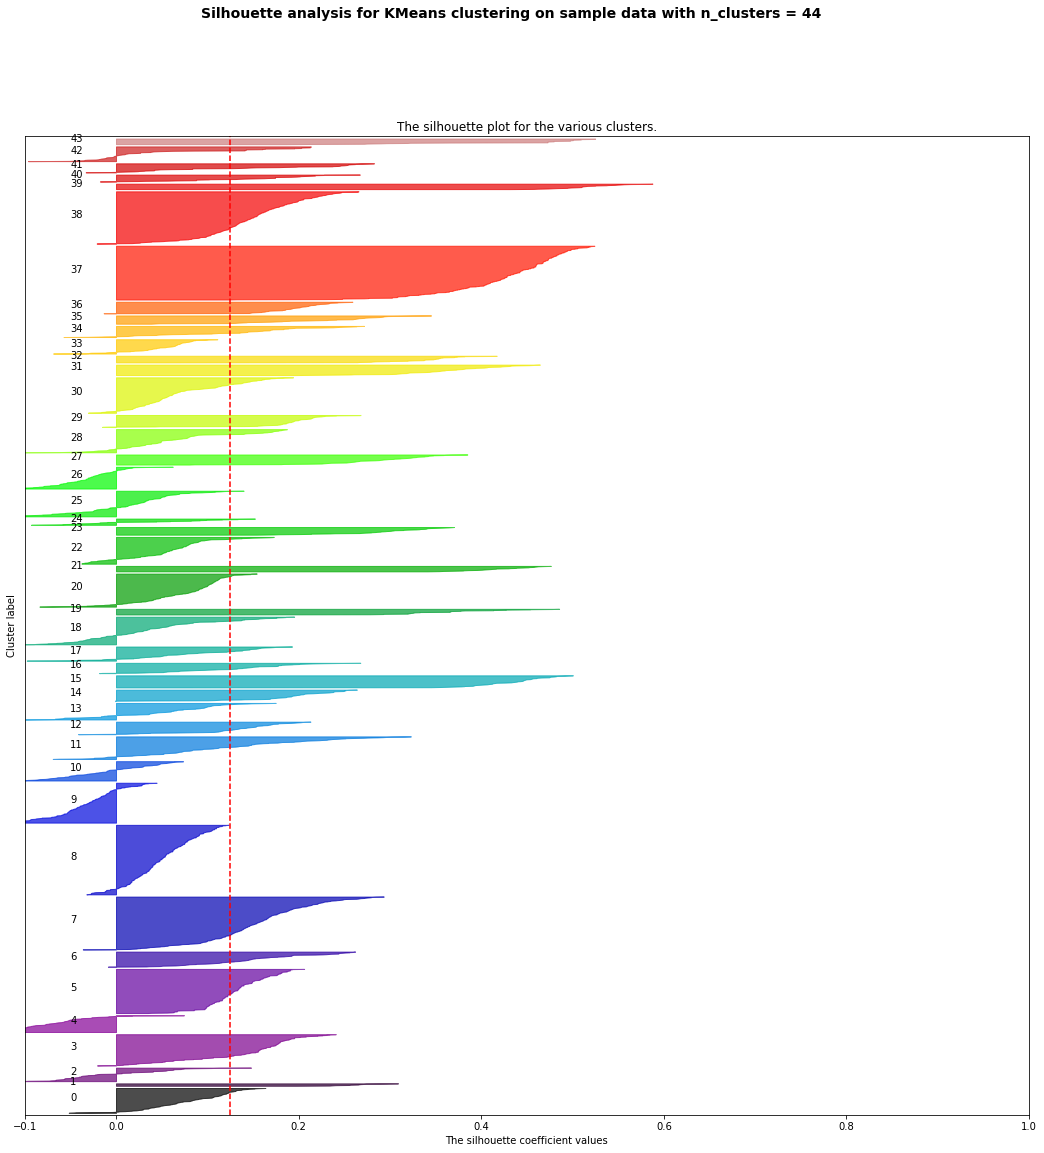

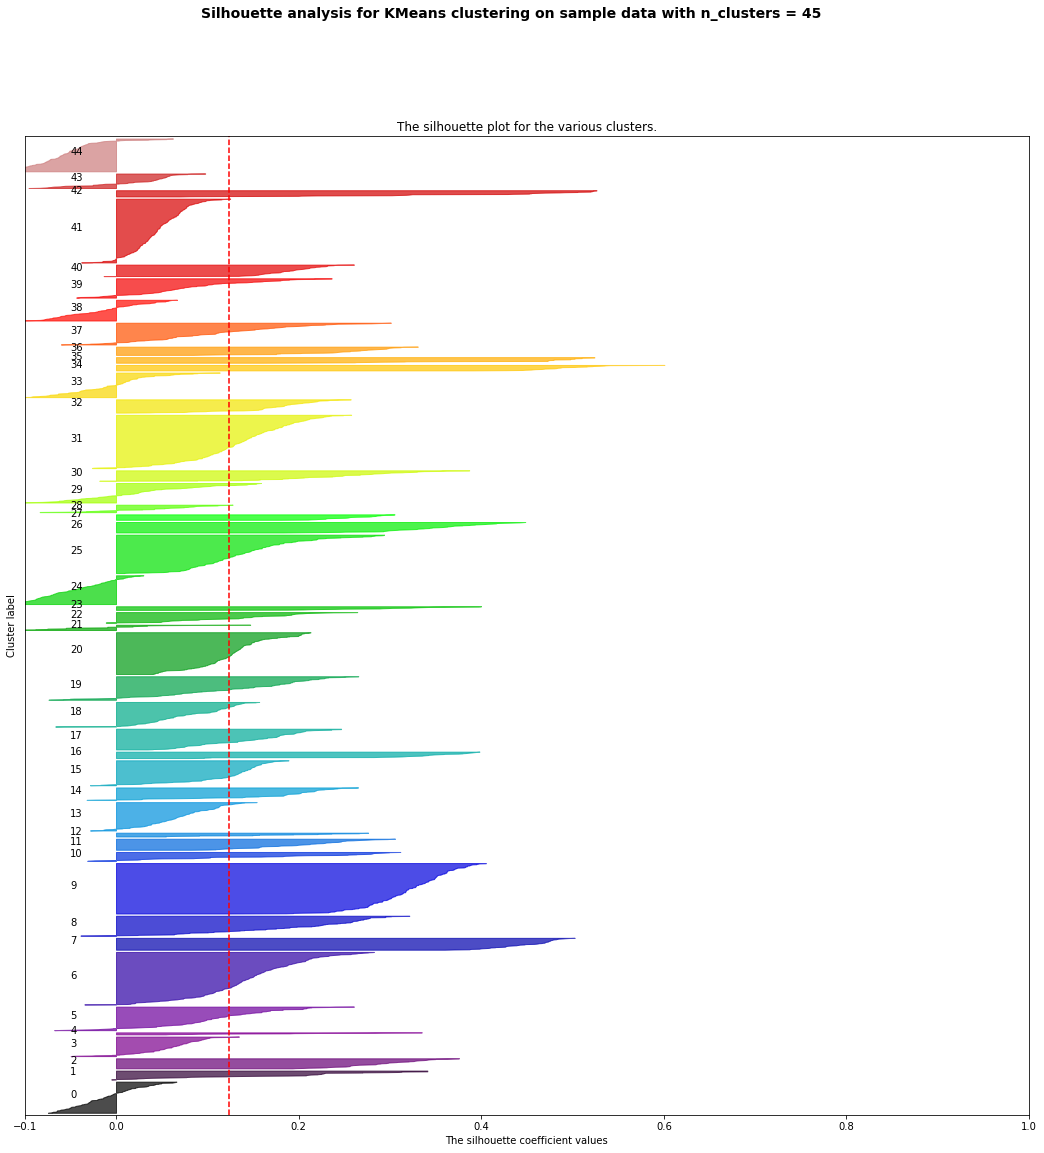

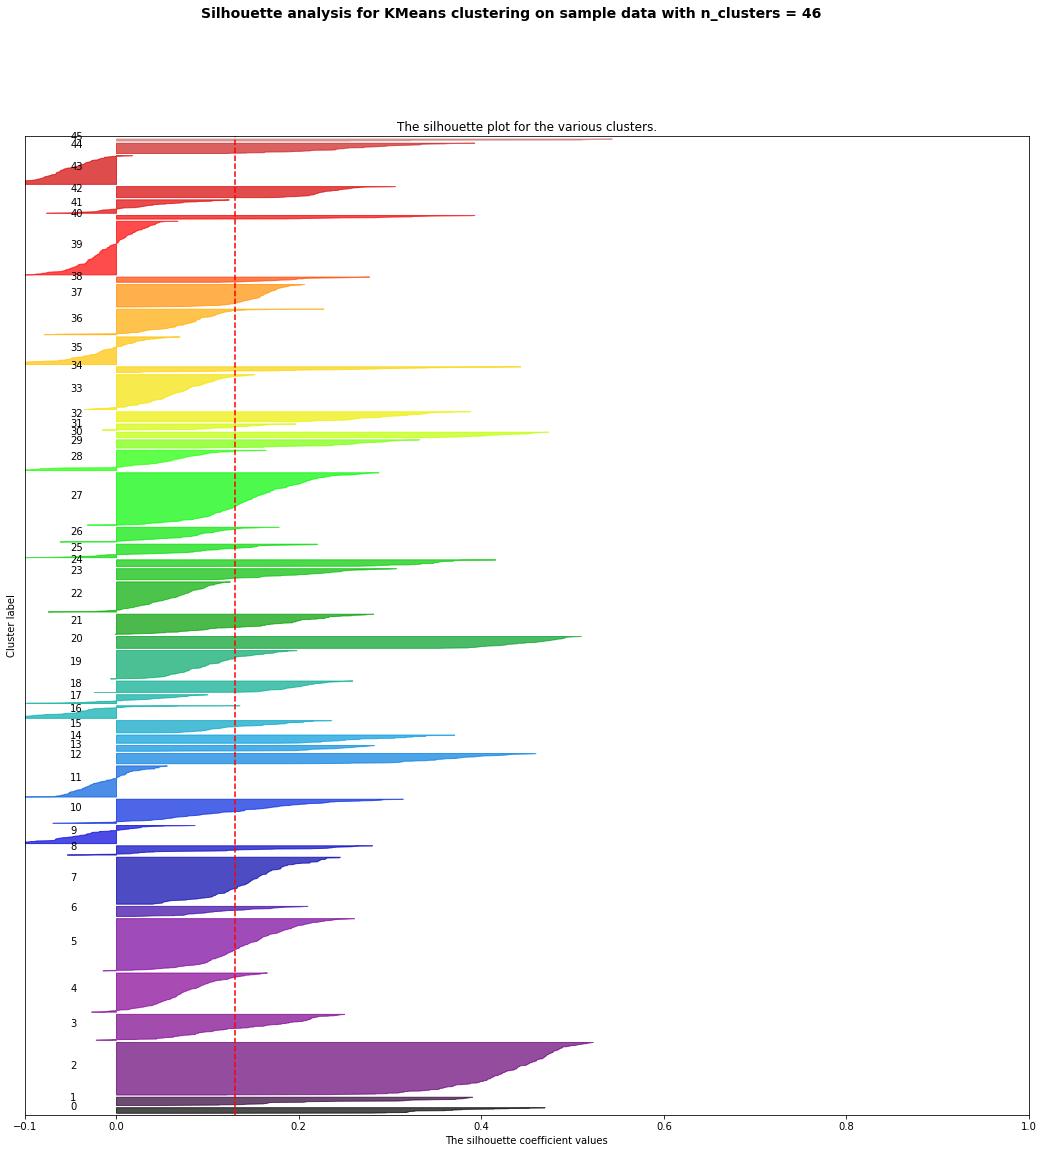

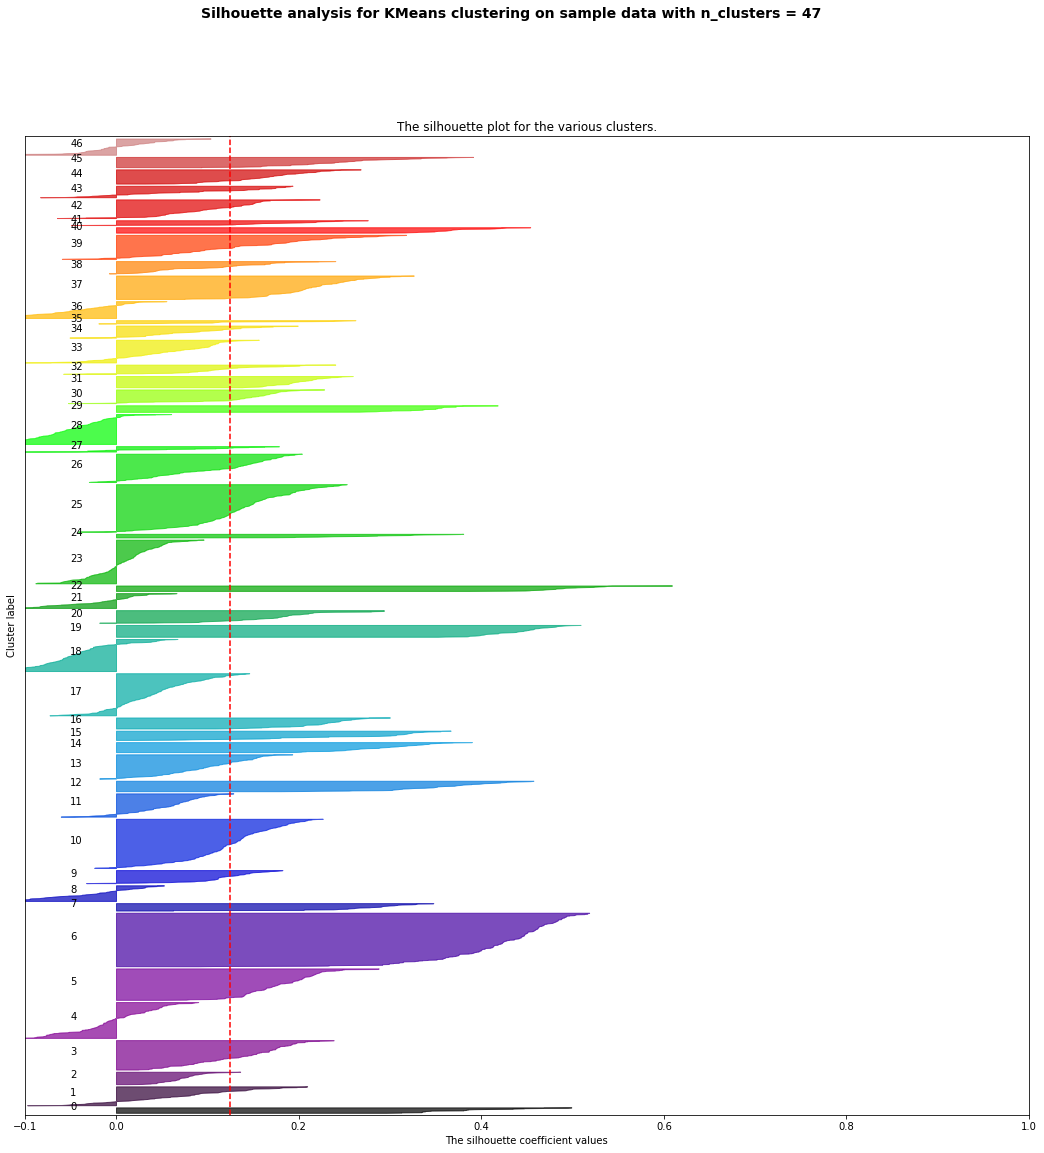

In [27]:
title_tfidf.SilhouettePlot(range_n_clusters=[43, 44, 45, 46, 47])


Matriz de distância dos agrupamentos para os métodos TF-IDF e BERT

In [28]:
bert_distances = title_bert.ClustersDistances()
tfidf_distances = title_tfidf.ClustersDistances()

In [29]:
fig = px.imshow(bert_distances, text_auto=True)
fig.show()

In [30]:
fig = px.imshow(tfidf_distances, text_auto=True)
fig.show()

### DBScan aplicado na descrição

Geração do vetor utilizando o BERT e avaliação do melhor valor de eps

0.05 0.44214743
0.1 0.55250037
0.15000000000000002 0.595598
0.2 0.58374554
0.25 0.53905666
0.3 0.4786983
0.35 0.38291597
0.39999999999999997 0.17429814
0.44999999999999996 0.07741137
0.49999999999999994 0.07586272
0.5499999999999999 0.04969571
0.6 0.076134376
0.65 0.103208706


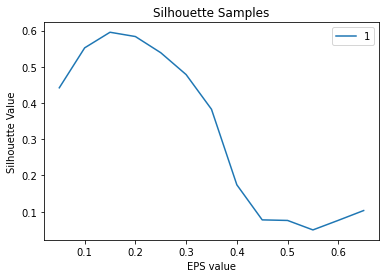

(0.15000000000000002, 0.595598)


In [60]:
desc_bert = description.Bert()
bestEPS_desc_bert, desc_EPSValues_bert = desc_bert.BestEPS(max_eps=0.65)
print(bestEPS_desc_bert)

Número de clusters para cada valor de eps

In [61]:
for eps in desc_EPSValues_bert.index:
    desc_bert.DBScan(eps=eps)
    print(eps, len(np.unique(desc_bert.values.cluster)))

0.05 114
0.1 118
0.15000000000000002 120
0.2 109
0.25 103
0.3 81
0.35 72
0.39999999999999997 47
0.44999999999999996 25
0.49999999999999994 17
0.5499999999999999 10
0.6 5
0.65 3


Geração do vetor utilizando o TF-IDF e avaliação do melhor valor de eps

0.05 0.20093089365530165
0.1 0.38501354198481025
0.15000000000000002 0.5630713405029067
0.2 0.578621995152173
0.25 0.6219631166299647
0.3 0.6219631166299647


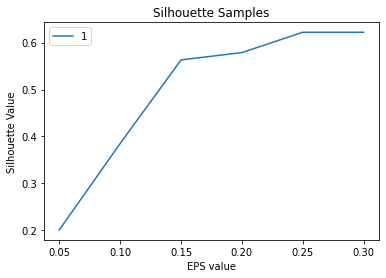

(0.25, 0.6219631166299647)


In [32]:
desc_tfidf = description.Tfidf()
bestEPS_desc_tfidf, desc_EPSvalues_tfidf = desc_tfidf.BestEPS(max_eps=0.3)
print(bestEPS_desc_tfidf)

### DBScan aplicado no título

Geração do vetor utilizando o BERT e avaliação do melhor valor de eps

In [65]:
title_bert = title.Bert()

0.05 -0.1295585221577434
0.1 -0.02673721474258115
0.15000000000000002 0.02215596169892559
0.2 -0.019280751979827458
0.25 -0.00851492131471767
0.3 0.07473255253958713
0.35 0.10134124544433708
0.39999999999999997 0.19224492651930078
0.44999999999999996 0.19305476866053767
0.49999999999999994 0.20033857999667198


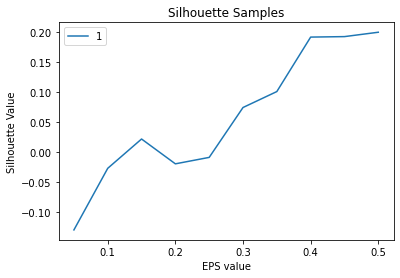

(0.49999999999999994, 0.20033857999667198)


In [63]:

bestEPS_title_bert, title_EPSValues_bert = title_bert.BestEPS(max_eps=0.5)
print(bestEPS_title_bert)

Número de clusters para cada valor de eps

In [66]:
for eps in title_EPSValues_bert.index:
    title_bert.DBScan(eps=eps)
    print(eps, len(np.unique(title_bert.values.cluster)))

0.05 81
0.1 150
0.15000000000000002 133
0.2 99
0.25 56
0.3 30
0.35 18
0.39999999999999997 8
0.44999999999999996 3
0.49999999999999994 2


In [67]:
title_tfidf = title.Tfidf()

0.05 -0.1295585221577434
0.1 -0.02673721474258115
0.15000000000000002 0.02215596169892559
0.2 -0.019280751979827458
0.25 -0.00851492131471767
0.3 0.07473255253958713
0.35 0.10134124544433708
0.39999999999999997 0.19224492651930078
0.44999999999999996 0.19305476866053767
0.49999999999999994 0.20033857999667198


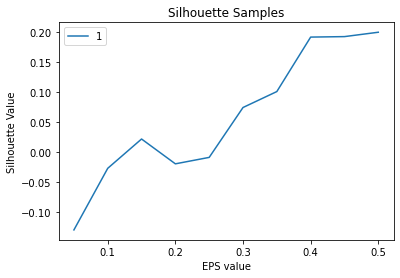

(0.49999999999999994, 0.20033857999667198)


In [68]:
bestEPS_title_tfidf, title_EPSvalues_tfidf = title_tfidf.BestEPS(max_eps=0.50)
print(bestEPS_title_tfidf)

Número de clusters para cada valor de eps

In [69]:
for eps in title_EPSvalues_tfidf.index:
    title_tfidf.DBScan(eps=eps)
    print(eps, len(np.unique(title_tfidf.values.cluster)))

0.05 105
0.1 95
0.15000000000000002 71
0.2 37
0.25 22
0.3 6
0.35 5
0.39999999999999997 3
0.44999999999999996 3
0.49999999999999994 2
